In [92]:
!pip install tensorflow-gpu==2.0.0b1

In [0]:
import tensorflow as tf
from tensorflow import keras
from tensorflow.keras import layers
import numpy as np
import matplotlib.pyplot as plt

In [94]:
tf.__version__

'2.0.0-beta1'

In [95]:
# Google 드라이브를 마운트하려면 이 셀을 실행하세요.
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [0]:
import os
im_dir = os.path.join("/content/drive/My Drive/workspace/Python/ML_Basic/RNN", 'ball_imgs')

In [97]:
x_train = []
file_list = os.listdir(im_dir)
file_list = sorted(file_list, key=str.lower)

import cv2

for name in file_list:
    print(os.path.join(im_dir, name))
    im = cv2.imread(os.path.join(im_dir, name), 0)
    im = cv2.resize(im, dsize = (64, 64))
    im = im.astype(np.float32)/255.
#     im = cv2.cvtColor(im, cv2.COLOR_BGR2RGB)
    x_train.append(im)

# print(os.path.join(im_dir, file_list[0]))
# im = cv2.imread(os.path.join(im_dir, file_list[0]), 0)
# im = cv2.resize(im, dsize = (64, 64))
# im = im.astype(np.float32)/255.
# # im = cv2.cvtColor(im, cv2.COLOR_BGR2RGB)
# x_train.append(im)

# x_train = np.array(x_train)    

/content/drive/My Drive/workspace/Python/ML_Basic/RNN/ball_imgs/04.png
/content/drive/My Drive/workspace/Python/ML_Basic/RNN/ball_imgs/05.png
/content/drive/My Drive/workspace/Python/ML_Basic/RNN/ball_imgs/06.png
/content/drive/My Drive/workspace/Python/ML_Basic/RNN/ball_imgs/07.png
/content/drive/My Drive/workspace/Python/ML_Basic/RNN/ball_imgs/08.png
/content/drive/My Drive/workspace/Python/ML_Basic/RNN/ball_imgs/09.png
/content/drive/My Drive/workspace/Python/ML_Basic/RNN/ball_imgs/10.png
/content/drive/My Drive/workspace/Python/ML_Basic/RNN/ball_imgs/11.png
/content/drive/My Drive/workspace/Python/ML_Basic/RNN/ball_imgs/12.png
/content/drive/My Drive/workspace/Python/ML_Basic/RNN/ball_imgs/13.png
/content/drive/My Drive/workspace/Python/ML_Basic/RNN/ball_imgs/14.png
/content/drive/My Drive/workspace/Python/ML_Basic/RNN/ball_imgs/15.png
/content/drive/My Drive/workspace/Python/ML_Basic/RNN/ball_imgs/38.png
/content/drive/My Drive/workspace/Python/ML_Basic/RNN/ball_imgs/39.png
/conte

In [0]:
inputs = layers.Input(shape=(64, 64, 1), name='inputs')
e_inputs = layers.Input(shape=(1, 64, 64, 6), name='e_in')

print(inputs.shape)
print(e_inputs.shape)

conv = layers.Conv2D(filters=3, kernel_size=3, strides=1, padding='same', use_bias=False)
A = conv(inputs)
A_forE = layers.ReLU()(A)

R1 = layers.ConvLSTM2D(filters=32, kernel_size=3, strides=1, padding='same', use_bias=False, kernel_initializer='glorot', return_sequences=True, kernel_regularizer=keras.regularizers.l2(l=0.01))(e_inputs)
R2 = layers.ConvLSTM2D(filters=64, kernel_size=3, strides=1, padding='same', use_bias=False, return_sequences=True, kernel_regularizer=keras.regularizers.l2(l=0.01))(R1)
R3 = layers.ConvLSTM2D(filters=128, kernel_size=3, strides=1, padding='same', use_bias=False, return_sequences=True, kernel_regularizer=keras.regularizers.l2(l=0.01))(R2)
R4 = layers.ConvLSTM2D(filters=256, kernel_size=3, strides=1, padding='same', use_bias=False, kernel_regularizer=keras.regularizers.l2(l=0.01))(R3)

Ahat = layers.Conv2D(filters=128, kernel_size=3, strides=1, padding='same', use_bias=False, kernel_regularizer=keras.regularizers.l2(l=0.01))(R4)
Ahat = layers.Conv2D(filters=64, kernel_size=3, strides=1, padding='same', use_bias=False, kernel_regularizer=keras.regularizers.l2(l=0.01))(Ahat)
Ahat = layers.Conv2D(filters=32, kernel_size=3, strides=1, padding='same', use_bias=False, kernel_regularizer=keras.regularizers.l2(l=0.01))(Ahat)
Ahat = layers.Conv2D(filters=3, kernel_size=3, strides=1, padding='same', use_bias=False, kernel_regularizer=keras.regularizers.l2(l=0.01))(Ahat)
Ahat = layers.Conv2D(filters=1, kernel_size=3, strides=1, padding='same', use_bias=False, kernel_regularizer=keras.regularizers.l2(l=0.01))(Ahat)
Ahat = layers.ReLU()(Ahat)
Ahat = keras.activations.tanh(Ahat)

Ahat_forE = conv(Ahat)
Ahat_forE = layers.ReLU()(Ahat_forE)

e0 = layers.Subtract()([A_forE, Ahat_forE])
e1 = layers.Subtract()([Ahat_forE, A_forE])
E = layers.concatenate([e0, e1], axis=-1)
E = keras.activations.relu(E)
E = layers.Reshape((1, 64, 64, 6))(E)



(None, 64, 64, 1)
(None, 1, 64, 64, 6)


ValueError: ignored

In [98]:
inputs = layers.Input(shape=(64, 64, 1), name='inputs')
e_inputs = layers.Input(shape=(1, 64, 64, 6), name='e_in')

print(inputs.shape)
print(e_inputs.shape)

conv = layers.Conv2D(filters=3, kernel_size=3, strides=1, padding='same', use_bias=False)
A = conv(inputs)
A_forE = layers.ReLU()(A)

R1 = layers.ConvLSTM2D(filters=32, kernel_size=3, strides=1, padding='same', use_bias=False, return_sequences=True)(e_inputs)
R2 = layers.ConvLSTM2D(filters=64, kernel_size=3, strides=1, padding='same', use_bias=False, return_sequences=True)(R1)
R3 = layers.ConvLSTM2D(filters=128, kernel_size=3, strides=1, padding='same', use_bias=False, return_sequences=True)(R2)
R4 = layers.ConvLSTM2D(filters=256, kernel_size=3, strides=1, padding='same', use_bias=False)(R3)

Ahat = layers.Conv2D(filters=128, kernel_size=3, strides=1, padding='same', use_bias=False)(R4)
Ahat = layers.Conv2D(filters=64, kernel_size=3, strides=1, padding='same', use_bias=False)(Ahat)
Ahat = layers.Conv2D(filters=32, kernel_size=3, strides=1, padding='same', use_bias=False)(Ahat)
Ahat = layers.Conv2D(filters=3, kernel_size=3, strides=1, padding='same', use_bias=False)(Ahat)
Ahat = layers.Conv2D(filters=1, kernel_size=3, strides=1, padding='same', use_bias=False)(Ahat)
#Ahat = layers.ReLU()(Ahat)
#Ahat = keras.activations.tanh(Ahat)

Ahat_forE = conv(Ahat)
Ahat_forE = layers.ReLU()(Ahat_forE)

print(Ahat_forE.shape)

e0 = layers.Subtract()([A_forE, Ahat_forE])
e1 = layers.Subtract()([Ahat_forE, A_forE])
E = layers.concatenate([e0, e1], axis=-1)
E = keras.activations.relu(E)
E = layers.Reshape((1, 64, 64, 6))(E)



(None, 64, 64, 1)
(None, 1, 64, 64, 6)
(None, 64, 64, 3)


In [0]:
pm = keras.Model(inputs=[inputs, e_inputs], outputs=[Ahat])
hm = keras.Model(inputs=[inputs, e_inputs], outputs=[E])

In [0]:
pm.summary()

Model: "model_15"
__________________________________________________________________________________________________
Layer (type)                    Output Shape         Param #     Connected to                     
e_in (InputLayer)               [(None, 1, 64, 64, 6 0                                            
__________________________________________________________________________________________________
conv_lst_m2d_36 (ConvLSTM2D)    (None, 1, 64, 64, 32 43776       e_in[0][0]                       
__________________________________________________________________________________________________
conv_lst_m2d_37 (ConvLSTM2D)    (None, 1, 64, 64, 64 221184      conv_lst_m2d_36[0][0]            
__________________________________________________________________________________________________
conv_lst_m2d_38 (ConvLSTM2D)    (None, 1, 64, 64, 12 884736      conv_lst_m2d_37[0][0]            
___________________________________________________________________________________________

In [0]:
hm.summary()

Model: "model_16"
__________________________________________________________________________________________________
Layer (type)                    Output Shape         Param #     Connected to                     
e_in (InputLayer)               [(None, 1, 64, 64, 6 0                                            
__________________________________________________________________________________________________
conv_lst_m2d_36 (ConvLSTM2D)    (None, 1, 64, 64, 32 43776       e_in[0][0]                       
__________________________________________________________________________________________________
conv_lst_m2d_37 (ConvLSTM2D)    (None, 1, 64, 64, 64 221184      conv_lst_m2d_36[0][0]            
__________________________________________________________________________________________________
conv_lst_m2d_38 (ConvLSTM2D)    (None, 1, 64, 64, 12 884736      conv_lst_m2d_37[0][0]            
___________________________________________________________________________________________

In [0]:
pm.compile('adam', 'mean_squared_error')
hm.compile('adam', 'mean_squared_error')

In [0]:
def grad(aInput, aOutput, anE):
#   e0 = np.subtract(aInput, aOutput)
#   e1 = np.subtract(aOutput, aInput)
  
#   E = np.concatenate([e0, e1], axis=-1)
#   E = np.maximum(E, 0)
#   E = np.expand_dims(E, 0)
  
#   hm.fit({'inputs':aInput, 'e_in':E}, [anE], 1, 1)
  pm.fit({'inputs':aInput, 'e_in':anE}, [aOutput], 1, 1)
  pred_img = pm.predict({'inputs':aInput, 'e_in': anE})
  next_E = hm.predict({'inputs':aInput, 'e_in': anE})
  
  return pred_img, next_E

Reset
Train on 1 samples
1/1 [==============================] - 2s 2s/sample - loss: 0.7411


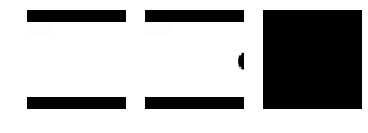

Train on 1 samples
1/1 [==============================] - 0s 61ms/sample - loss: 0.7254


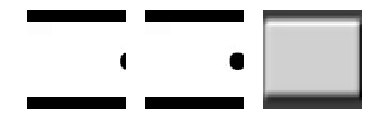

Train on 1 samples
1/1 [==============================] - 0s 57ms/sample - loss: 0.7215


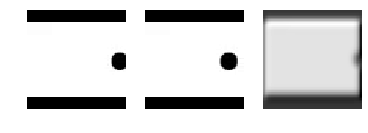

Train on 1 samples
1/1 [==============================] - 0s 51ms/sample - loss: 0.7170


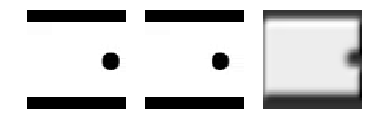

Train on 1 samples
1/1 [==============================] - 0s 56ms/sample - loss: 0.6932


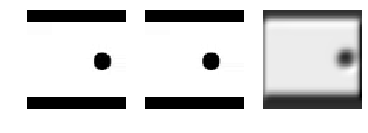

Train on 1 samples
1/1 [==============================] - 0s 56ms/sample - loss: 0.6022


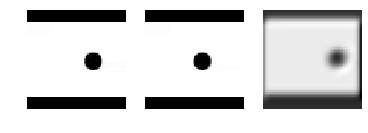

Train on 1 samples
1/1 [==============================] - 0s 52ms/sample - loss: 0.4172


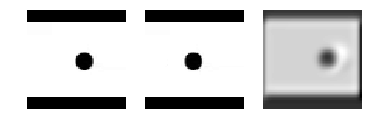

Train on 1 samples
1/1 [==============================] - 0s 54ms/sample - loss: 0.5228


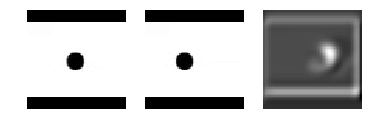

Train on 1 samples
1/1 [==============================] - 0s 53ms/sample - loss: 2.9252


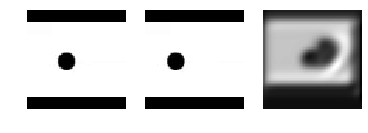

Train on 1 samples
1/1 [==============================] - 0s 53ms/sample - loss: 0.3631


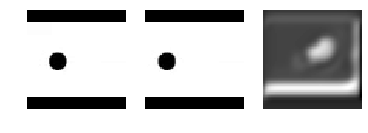

Train on 1 samples
1/1 [==============================] - 0s 51ms/sample - loss: 0.1917


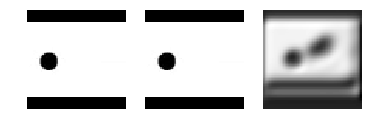

Train on 1 samples
1/1 [==============================] - 0s 51ms/sample - loss: 0.2956


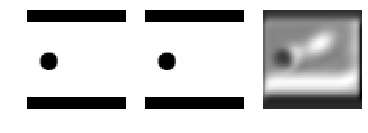

Train on 1 samples
1/1 [==============================] - 0s 51ms/sample - loss: 0.3847


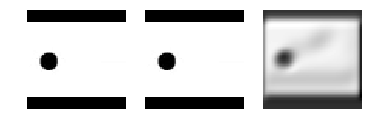

Train on 1 samples
1/1 [==============================] - 0s 51ms/sample - loss: 0.4908


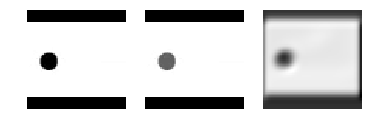

Train on 1 samples
1/1 [==============================] - 0s 49ms/sample - loss: 0.5633


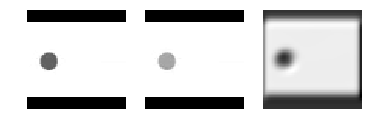

Train on 1 samples
1/1 [==============================] - 0s 49ms/sample - loss: 0.6084


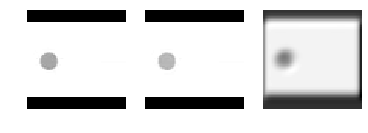

Train on 1 samples
1/1 [==============================] - 0s 60ms/sample - loss: 0.6396


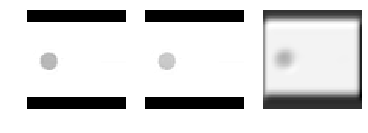

Train on 1 samples
1/1 [==============================] - 0s 52ms/sample - loss: 0.6616


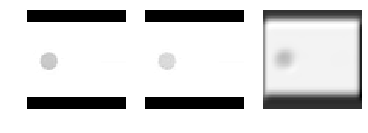

Train on 1 samples
1/1 [==============================] - 0s 54ms/sample - loss: 0.6777


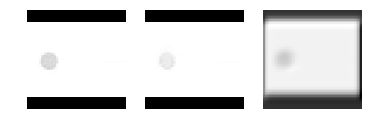

Reset
Train on 1 samples
1/1 [==============================] - 0s 57ms/sample - loss: 0.7411


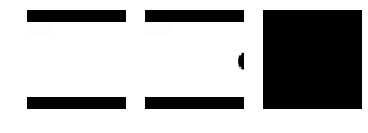

Train on 1 samples
1/1 [==============================] - 0s 50ms/sample - loss: 0.6720


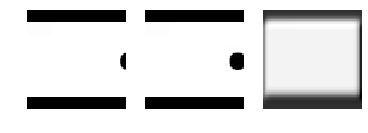

Train on 1 samples
1/1 [==============================] - 0s 53ms/sample - loss: 0.6760


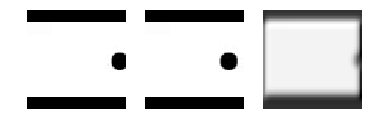

Train on 1 samples
1/1 [==============================] - 0s 51ms/sample - loss: 0.6795


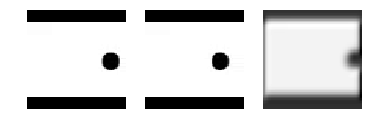

Train on 1 samples
1/1 [==============================] - 0s 50ms/sample - loss: 0.6818


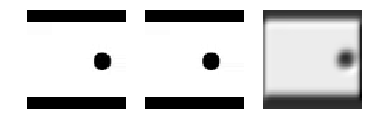

Train on 1 samples
1/1 [==============================] - 0s 52ms/sample - loss: 0.6827


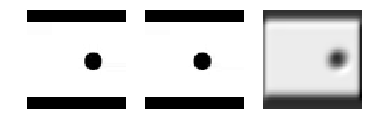

Train on 1 samples
1/1 [==============================] - 0s 50ms/sample - loss: 0.6823


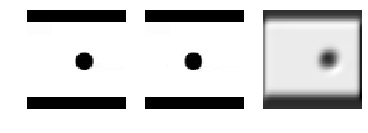

Train on 1 samples
1/1 [==============================] - 0s 50ms/sample - loss: 0.6817


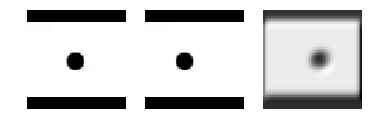

Train on 1 samples
1/1 [==============================] - 0s 51ms/sample - loss: 0.6802


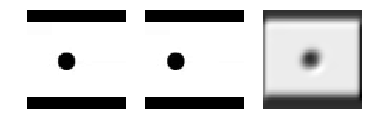

Train on 1 samples
1/1 [==============================] - 0s 51ms/sample - loss: 0.6784


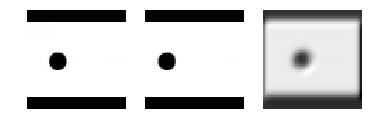

Train on 1 samples
1/1 [==============================] - 0s 50ms/sample - loss: 0.6747


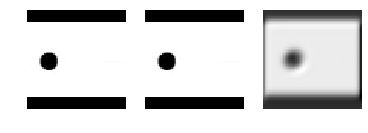

Train on 1 samples
1/1 [==============================] - 0s 50ms/sample - loss: 0.6703


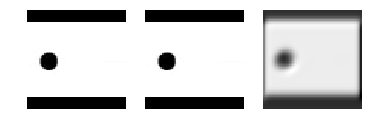

Train on 1 samples
1/1 [==============================] - 0s 54ms/sample - loss: 0.6652


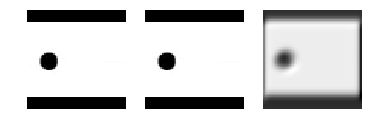

Train on 1 samples
1/1 [==============================] - 0s 53ms/sample - loss: 0.6634


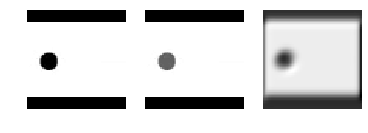

Train on 1 samples
1/1 [==============================] - 0s 55ms/sample - loss: 0.6625


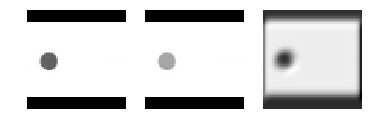

Train on 1 samples
1/1 [==============================] - 0s 54ms/sample - loss: 0.6537


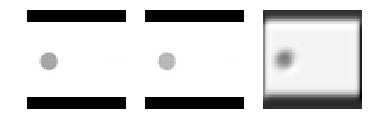

Train on 1 samples
1/1 [==============================] - 0s 50ms/sample - loss: 0.6425


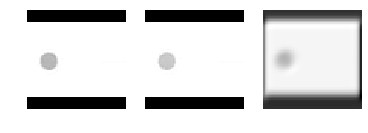

Train on 1 samples
1/1 [==============================] - 0s 53ms/sample - loss: 0.6280


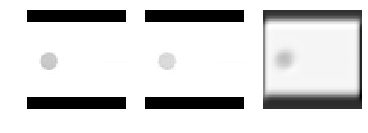

Train on 1 samples
1/1 [==============================] - 0s 52ms/sample - loss: 0.6092


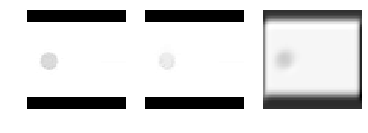

Reset
Train on 1 samples
1/1 [==============================] - 0s 52ms/sample - loss: 0.7411


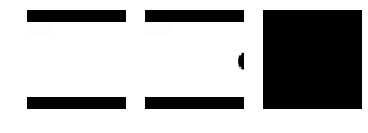

Train on 1 samples
1/1 [==============================] - 0s 51ms/sample - loss: 0.5097


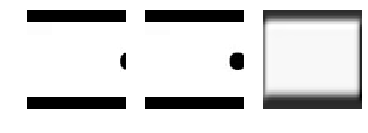

Train on 1 samples
1/1 [==============================] - 0s 51ms/sample - loss: 0.5091


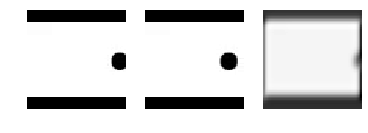

Train on 1 samples
1/1 [==============================] - 0s 50ms/sample - loss: 0.4622


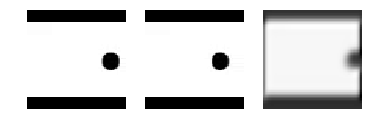

Train on 1 samples
1/1 [==============================] - 0s 51ms/sample - loss: 0.4165


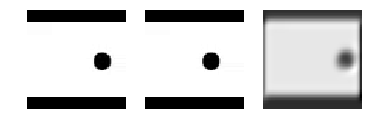

Train on 1 samples
1/1 [==============================] - 0s 52ms/sample - loss: 0.3592


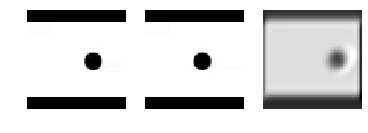

Train on 1 samples
1/1 [==============================] - 0s 49ms/sample - loss: 0.3038


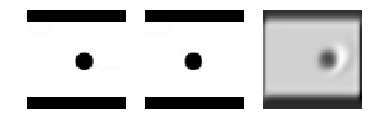

Train on 1 samples
1/1 [==============================] - 0s 52ms/sample - loss: 0.2522


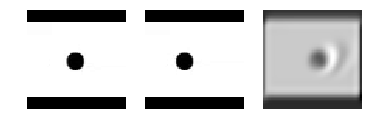

Train on 1 samples
1/1 [==============================] - 0s 53ms/sample - loss: 0.2127


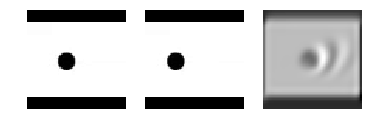

Train on 1 samples
1/1 [==============================] - 0s 52ms/sample - loss: 0.1830


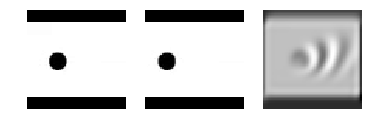

Train on 1 samples
1/1 [==============================] - 0s 54ms/sample - loss: 0.1874


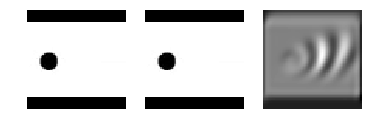

Train on 1 samples
1/1 [==============================] - 0s 51ms/sample - loss: 0.2429


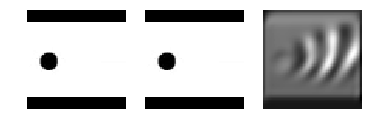

Train on 1 samples
1/1 [==============================] - 0s 52ms/sample - loss: 0.5128


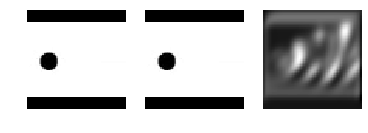

Train on 1 samples
1/1 [==============================] - 0s 52ms/sample - loss: 1.8132


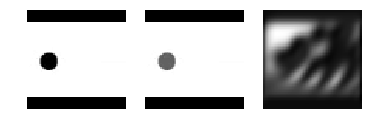

Train on 1 samples
1/1 [==============================] - 0s 49ms/sample - loss: 1.0550


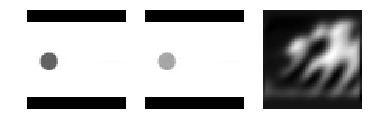

Train on 1 samples
1/1 [==============================] - 0s 49ms/sample - loss: 0.7256


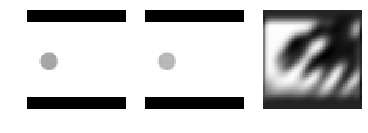

Train on 1 samples
1/1 [==============================] - 0s 55ms/sample - loss: 0.3376


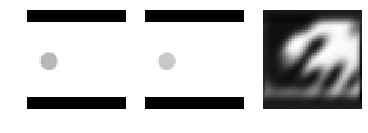

Train on 1 samples
1/1 [==============================] - 0s 49ms/sample - loss: 0.2355


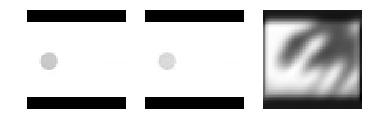

Train on 1 samples
1/1 [==============================] - 0s 48ms/sample - loss: 0.3746


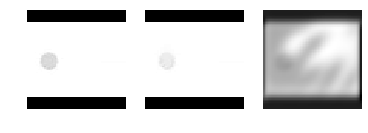

Reset
Train on 1 samples
1/1 [==============================] - 0s 52ms/sample - loss: 0.7411


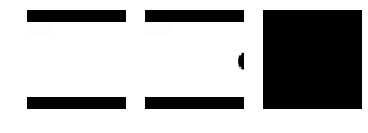

Train on 1 samples
1/1 [==============================] - 0s 53ms/sample - loss: 0.5087


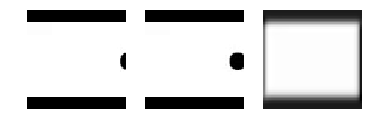

Train on 1 samples
1/1 [==============================] - 0s 50ms/sample - loss: 0.5878


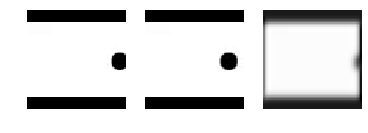

Train on 1 samples
1/1 [==============================] - 0s 50ms/sample - loss: 0.6219


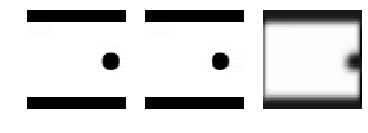

Train on 1 samples
1/1 [==============================] - 0s 53ms/sample - loss: 0.6454


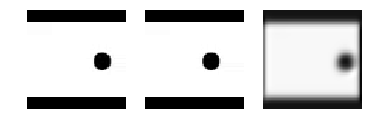

Train on 1 samples
1/1 [==============================] - 0s 50ms/sample - loss: 0.6607


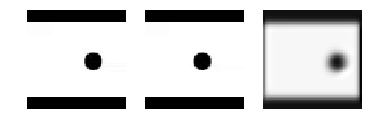

Train on 1 samples
1/1 [==============================] - 0s 50ms/sample - loss: 0.6708


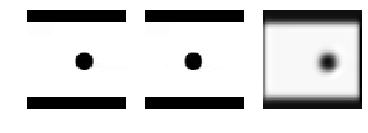

Train on 1 samples
1/1 [==============================] - 0s 50ms/sample - loss: 0.6784


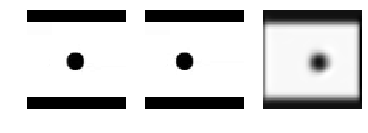

Train on 1 samples
1/1 [==============================] - 0s 51ms/sample - loss: 0.6835


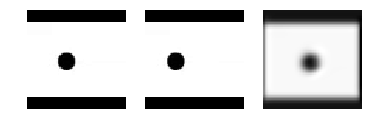

Train on 1 samples
1/1 [==============================] - 0s 52ms/sample - loss: 0.6876


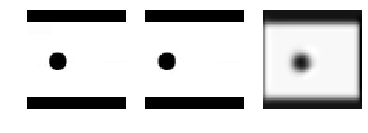

Train on 1 samples
1/1 [==============================] - 0s 50ms/sample - loss: 0.6897


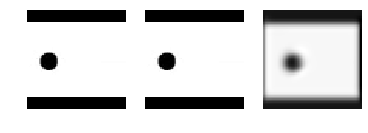

Train on 1 samples
1/1 [==============================] - 0s 48ms/sample - loss: 0.6912


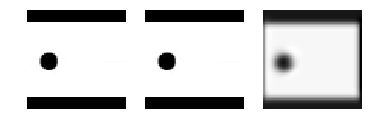

Train on 1 samples
1/1 [==============================] - 0s 52ms/sample - loss: 0.6924


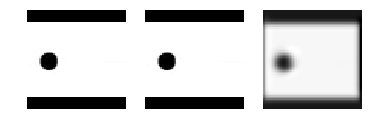

Train on 1 samples
1/1 [==============================] - 0s 52ms/sample - loss: 0.6979


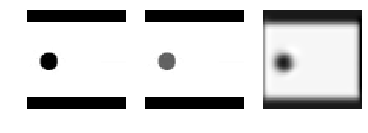

Train on 1 samples
1/1 [==============================] - 0s 51ms/sample - loss: 0.7055


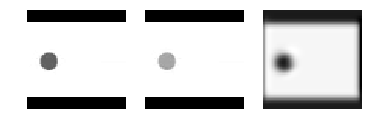

Train on 1 samples
1/1 [==============================] - 0s 56ms/sample - loss: 0.7074


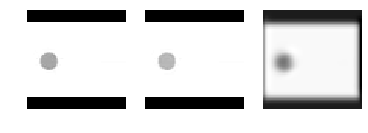

Train on 1 samples
1/1 [==============================] - 0s 50ms/sample - loss: 0.7094


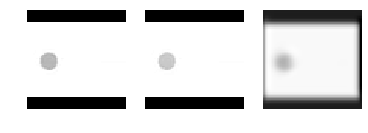

Train on 1 samples
1/1 [==============================] - 0s 49ms/sample - loss: 0.7112


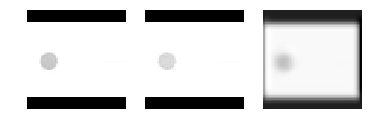

Train on 1 samples
1/1 [==============================] - 0s 49ms/sample - loss: 0.7131


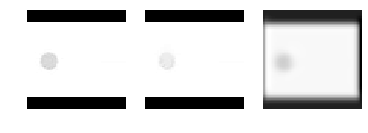

Reset
Train on 1 samples
1/1 [==============================] - 0s 52ms/sample - loss: 0.7411


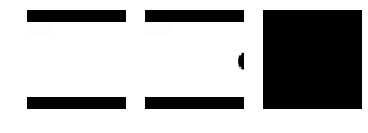

Train on 1 samples
1/1 [==============================] - 0s 52ms/sample - loss: 0.6894


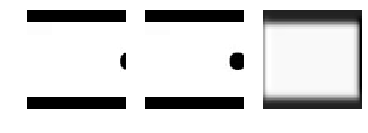

Train on 1 samples
1/1 [==============================] - 0s 49ms/sample - loss: 0.6861


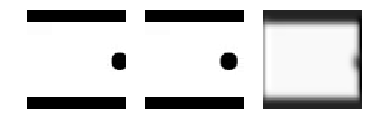

Train on 1 samples
1/1 [==============================] - 0s 50ms/sample - loss: 0.6846


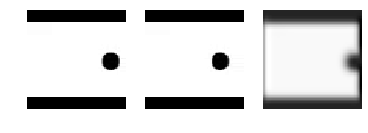

Train on 1 samples
1/1 [==============================] - 0s 50ms/sample - loss: 0.6830


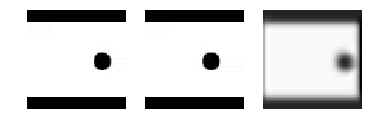

Train on 1 samples
1/1 [==============================] - 0s 51ms/sample - loss: 0.6805


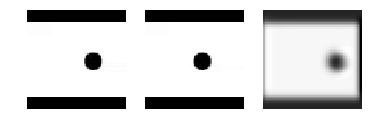

Train on 1 samples
1/1 [==============================] - 0s 52ms/sample - loss: 0.6770


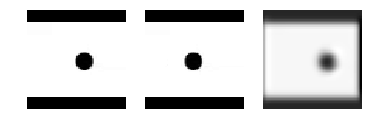

Train on 1 samples
1/1 [==============================] - 0s 49ms/sample - loss: 0.6735


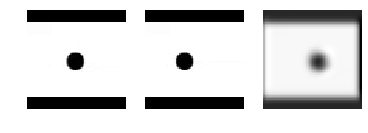

Train on 1 samples
1/1 [==============================] - 0s 52ms/sample - loss: 0.6691


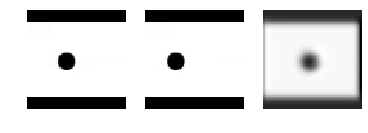

Train on 1 samples
1/1 [==============================] - 0s 53ms/sample - loss: 0.6645


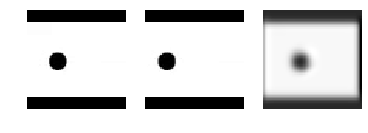

Train on 1 samples
1/1 [==============================] - 0s 52ms/sample - loss: 0.6576


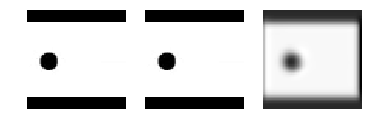

Train on 1 samples
1/1 [==============================] - 0s 51ms/sample - loss: 0.6500


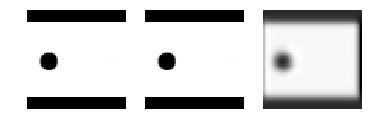

Train on 1 samples
1/1 [==============================] - 0s 52ms/sample - loss: 0.6415


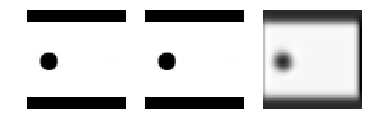

Train on 1 samples
1/1 [==============================] - 0s 52ms/sample - loss: 0.6357


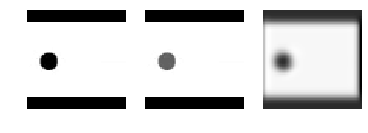

Train on 1 samples
1/1 [==============================] - 0s 51ms/sample - loss: 0.6304


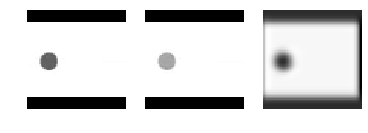

Train on 1 samples
1/1 [==============================] - 0s 55ms/sample - loss: 0.6161


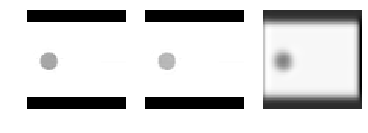

Train on 1 samples
1/1 [==============================] - 0s 51ms/sample - loss: 0.5986


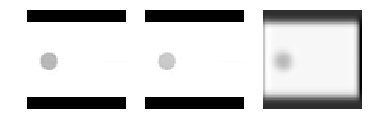

Train on 1 samples
1/1 [==============================] - 0s 51ms/sample - loss: 0.5773


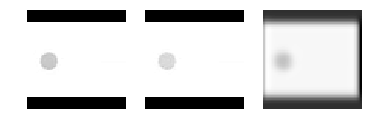

Train on 1 samples
1/1 [==============================] - 0s 52ms/sample - loss: 0.5503


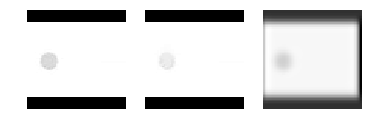

Reset
Train on 1 samples
1/1 [==============================] - 0s 53ms/sample - loss: 0.7411


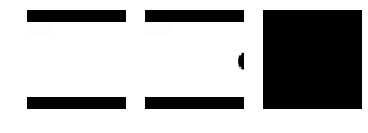

Train on 1 samples
1/1 [==============================] - 0s 49ms/sample - loss: 0.4055


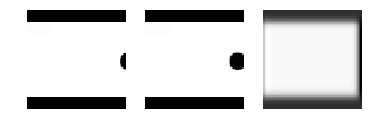

Train on 1 samples
1/1 [==============================] - 0s 49ms/sample - loss: 0.4451


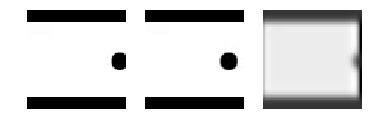

Train on 1 samples
1/1 [==============================] - 0s 51ms/sample - loss: 0.3693


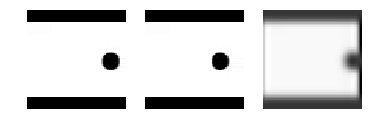

Train on 1 samples
1/1 [==============================] - 0s 50ms/sample - loss: 0.3374


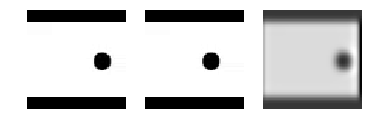

Train on 1 samples
1/1 [==============================] - 0s 50ms/sample - loss: 0.2720


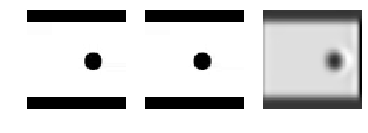

Train on 1 samples
1/1 [==============================] - 0s 50ms/sample - loss: 0.2473


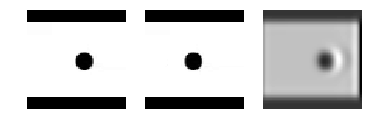

Train on 1 samples
1/1 [==============================] - 0s 51ms/sample - loss: 0.1836


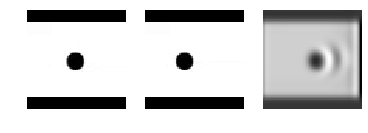

Train on 1 samples
1/1 [==============================] - 0s 49ms/sample - loss: 0.2542


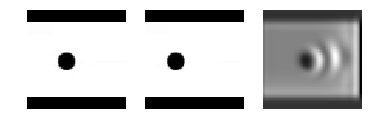

Train on 1 samples
1/1 [==============================] - 0s 50ms/sample - loss: 0.2161


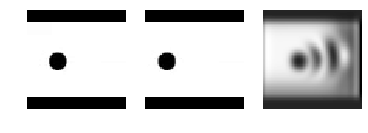

Train on 1 samples
1/1 [==============================] - 0s 49ms/sample - loss: 0.8694


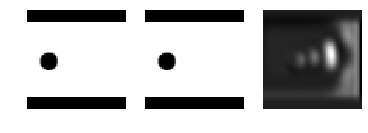

Train on 1 samples
1/1 [==============================] - 0s 50ms/sample - loss: 5.9661


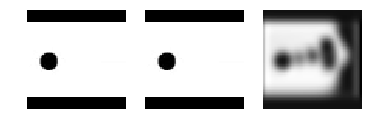

Train on 1 samples
1/1 [==============================] - 0s 50ms/sample - loss: 0.3756


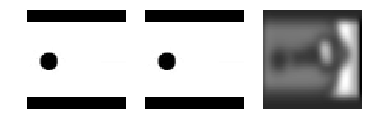

Train on 1 samples
1/1 [==============================] - 0s 53ms/sample - loss: 0.1275


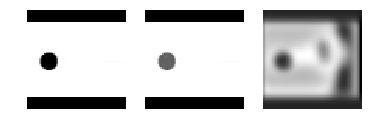

Train on 1 samples
1/1 [==============================] - 0s 52ms/sample - loss: 0.3128


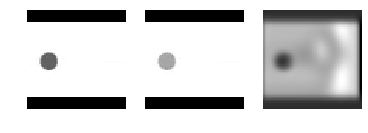

Train on 1 samples
1/1 [==============================] - 0s 51ms/sample - loss: 0.4205


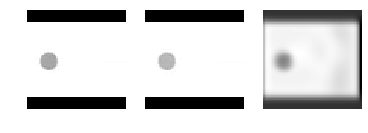

Train on 1 samples
1/1 [==============================] - 0s 56ms/sample - loss: 0.5237


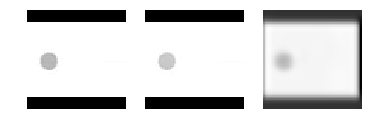

Train on 1 samples
1/1 [==============================] - 0s 50ms/sample - loss: 0.5902


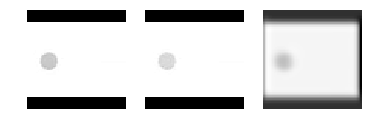

Train on 1 samples
1/1 [==============================] - 0s 53ms/sample - loss: 0.6345


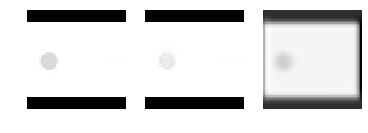

Reset
Train on 1 samples
1/1 [==============================] - 0s 53ms/sample - loss: 0.7411


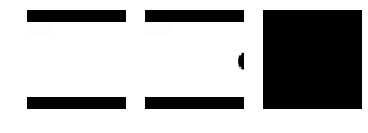

Train on 1 samples
1/1 [==============================] - 0s 51ms/sample - loss: 0.6569


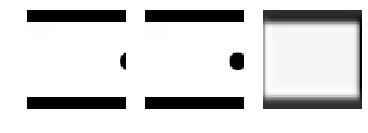

Train on 1 samples
1/1 [==============================] - 0s 53ms/sample - loss: 0.6695


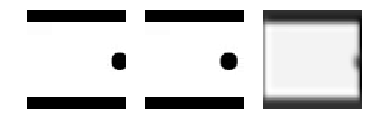

Train on 1 samples
1/1 [==============================] - 0s 50ms/sample - loss: 0.6778


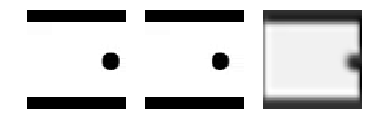

Train on 1 samples
1/1 [==============================] - 0s 50ms/sample - loss: 0.6837


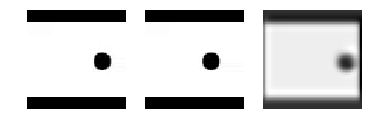

Train on 1 samples
1/1 [==============================] - 0s 52ms/sample - loss: 0.6875


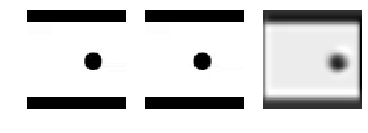

Train on 1 samples
1/1 [==============================] - 0s 52ms/sample - loss: 0.6895


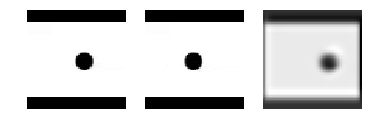

Train on 1 samples
1/1 [==============================] - 0s 51ms/sample - loss: 0.6912


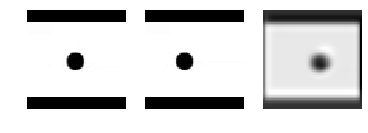

Train on 1 samples
1/1 [==============================] - 0s 53ms/sample - loss: 0.6919


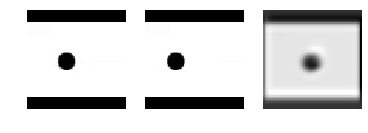

Train on 1 samples
1/1 [==============================] - 0s 52ms/sample - loss: 0.6927


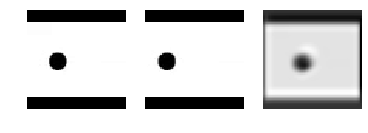

Train on 1 samples
1/1 [==============================] - 0s 51ms/sample - loss: 0.6920


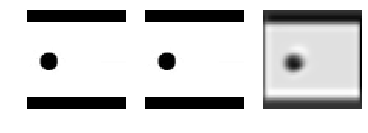

Train on 1 samples
1/1 [==============================] - 0s 50ms/sample - loss: 0.6909


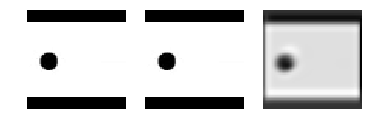

Train on 1 samples
1/1 [==============================] - 0s 52ms/sample - loss: 0.6898


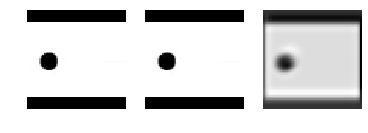

Train on 1 samples
1/1 [==============================] - 0s 49ms/sample - loss: 0.6930


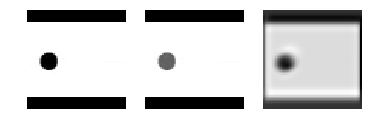

Train on 1 samples
1/1 [==============================] - 0s 51ms/sample - loss: 0.6983


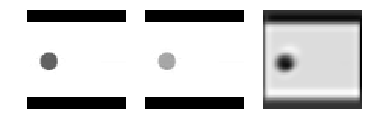

Train on 1 samples
1/1 [==============================] - 0s 48ms/sample - loss: 0.6976


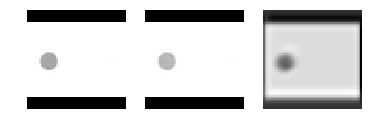

Train on 1 samples
1/1 [==============================] - 0s 51ms/sample - loss: 0.6967


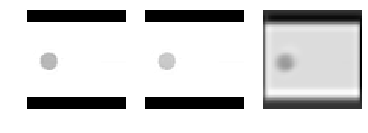

Train on 1 samples
1/1 [==============================] - 0s 50ms/sample - loss: 0.6951


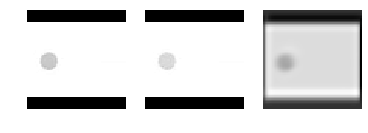

Train on 1 samples
1/1 [==============================] - 0s 50ms/sample - loss: 0.6930


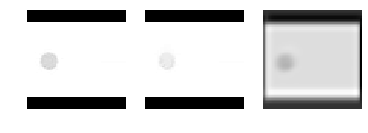

Reset
Train on 1 samples
1/1 [==============================] - 0s 52ms/sample - loss: 0.7411


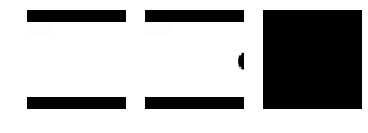

Train on 1 samples
1/1 [==============================] - 0s 52ms/sample - loss: 0.6587


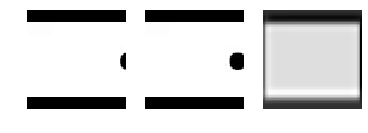

Train on 1 samples
1/1 [==============================] - 0s 52ms/sample - loss: 0.6522


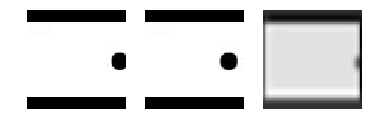

Train on 1 samples
1/1 [==============================] - 0s 55ms/sample - loss: 0.6442


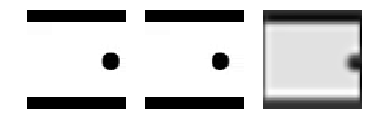

Train on 1 samples
1/1 [==============================] - 0s 49ms/sample - loss: 0.6345


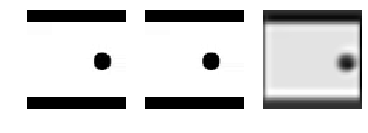

Train on 1 samples
1/1 [==============================] - 0s 52ms/sample - loss: 0.6215


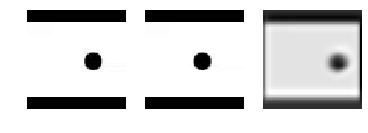

Train on 1 samples
1/1 [==============================] - 0s 48ms/sample - loss: 0.6051


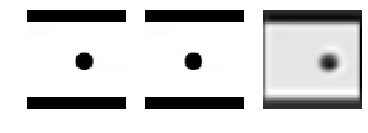

Train on 1 samples
1/1 [==============================] - 0s 54ms/sample - loss: 0.5853


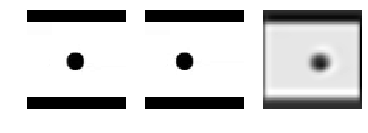

Train on 1 samples
1/1 [==============================] - 0s 49ms/sample - loss: 0.5606


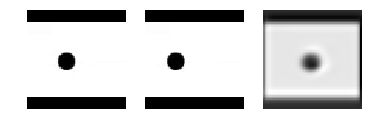

Train on 1 samples
1/1 [==============================] - 0s 50ms/sample - loss: 0.5305


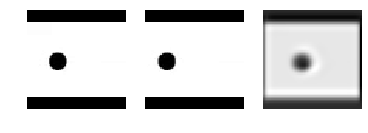

Train on 1 samples
1/1 [==============================] - 0s 51ms/sample - loss: 0.4899


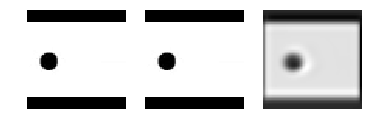

Train on 1 samples
1/1 [==============================] - 0s 50ms/sample - loss: 0.4410


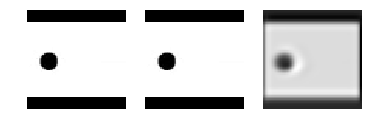

Train on 1 samples
1/1 [==============================] - 0s 49ms/sample - loss: 0.3889


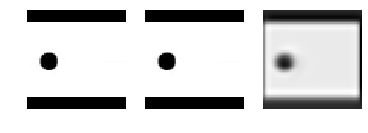

Train on 1 samples
1/1 [==============================] - 0s 51ms/sample - loss: 0.3337


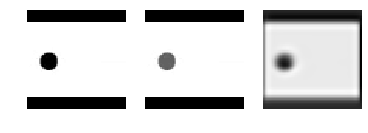

Train on 1 samples
1/1 [==============================] - 0s 50ms/sample - loss: 0.2828


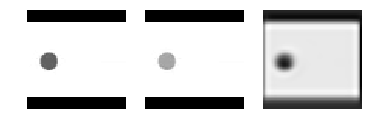

Train on 1 samples
1/1 [==============================] - 0s 48ms/sample - loss: 0.2285


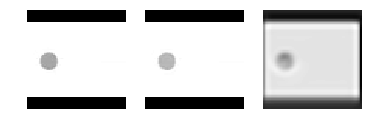

Train on 1 samples
1/1 [==============================] - 0s 50ms/sample - loss: 0.1952


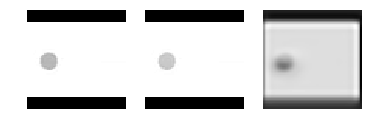

Train on 1 samples
1/1 [==============================] - 0s 51ms/sample - loss: 0.1635


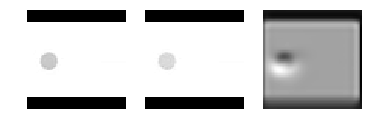

Train on 1 samples
1/1 [==============================] - 0s 51ms/sample - loss: 0.1943


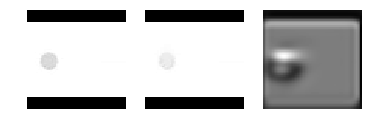

Reset
Train on 1 samples
1/1 [==============================] - 0s 51ms/sample - loss: 0.7411


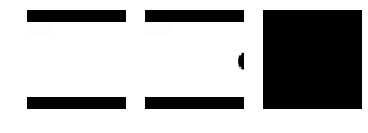

Train on 1 samples
1/1 [==============================] - 0s 51ms/sample - loss: 23.0142


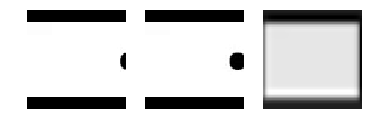

Train on 1 samples
1/1 [==============================] - 0s 52ms/sample - loss: 0.1112


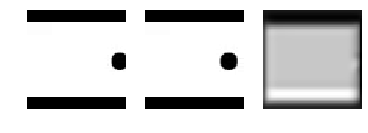

Train on 1 samples
1/1 [==============================] - 0s 51ms/sample - loss: 0.2564


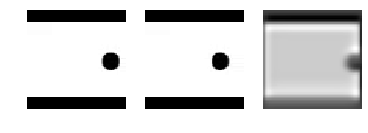

Train on 1 samples
1/1 [==============================] - 0s 53ms/sample - loss: 0.4833


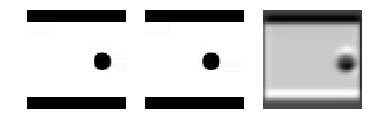

Train on 1 samples
1/1 [==============================] - 0s 58ms/sample - loss: 0.6150


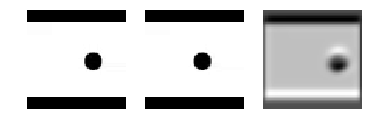

Train on 1 samples
1/1 [==============================] - 0s 52ms/sample - loss: 0.6723


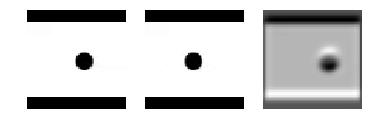

Train on 1 samples
1/1 [==============================] - 0s 55ms/sample - loss: 0.6973


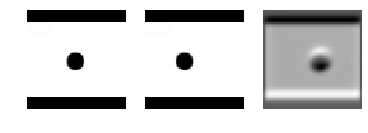

Train on 1 samples
1/1 [==============================] - 0s 50ms/sample - loss: 0.7086


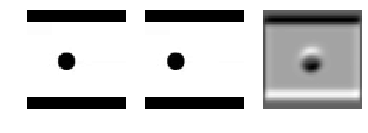

Train on 1 samples
1/1 [==============================] - 0s 49ms/sample - loss: 0.7147


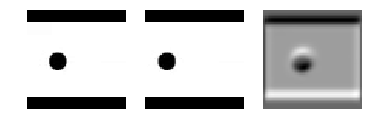

Train on 1 samples
1/1 [==============================] - 0s 53ms/sample - loss: 0.7178


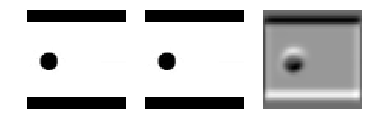

Train on 1 samples
1/1 [==============================] - 0s 55ms/sample - loss: 0.7194


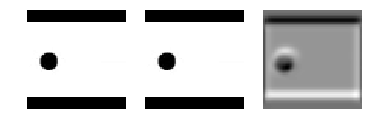

Train on 1 samples
1/1 [==============================] - 0s 51ms/sample - loss: 0.7203


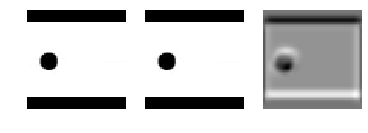

Train on 1 samples
1/1 [==============================] - 0s 50ms/sample - loss: 0.7258


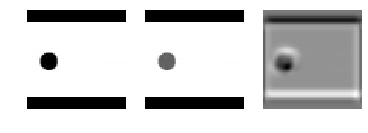

Train on 1 samples
1/1 [==============================] - 0s 53ms/sample - loss: 0.7334


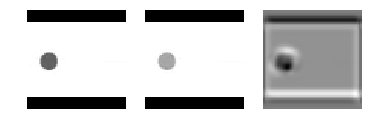

Train on 1 samples
1/1 [==============================] - 0s 51ms/sample - loss: 0.7358


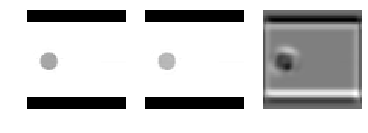

Train on 1 samples
1/1 [==============================] - 0s 50ms/sample - loss: 0.7385


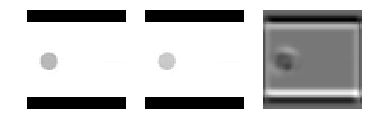

Train on 1 samples
1/1 [==============================] - 0s 51ms/sample - loss: 0.7412


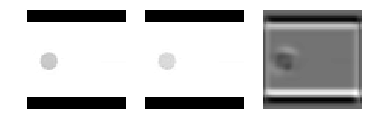

Train on 1 samples
1/1 [==============================] - 0s 55ms/sample - loss: 0.7443


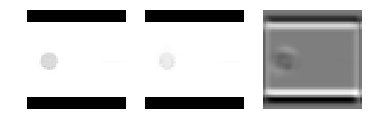

Reset
Train on 1 samples
1/1 [==============================] - 0s 50ms/sample - loss: 0.7411


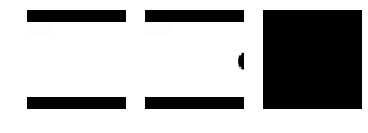

Train on 1 samples
1/1 [==============================] - 0s 52ms/sample - loss: 0.7235


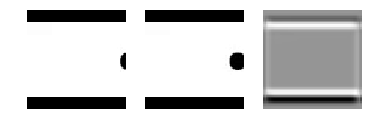

Train on 1 samples
1/1 [==============================] - 0s 51ms/sample - loss: 0.7202


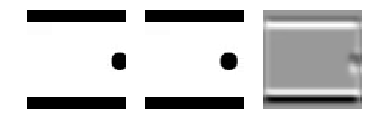

Train on 1 samples
1/1 [==============================] - 0s 50ms/sample - loss: 0.7196


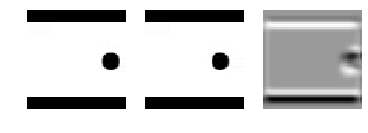

Train on 1 samples
1/1 [==============================] - 0s 50ms/sample - loss: 0.7194


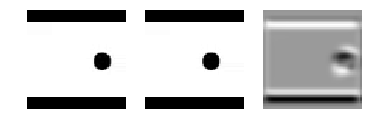

Train on 1 samples
1/1 [==============================] - 0s 49ms/sample - loss: 0.7187


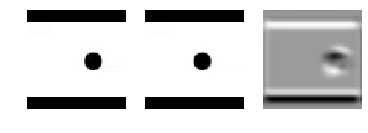

Train on 1 samples
1/1 [==============================] - 0s 51ms/sample - loss: 0.7172


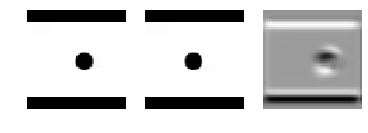

Train on 1 samples
1/1 [==============================] - 0s 52ms/sample - loss: 0.7156


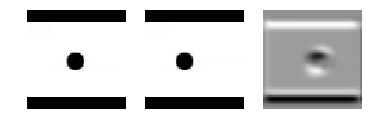

Train on 1 samples
1/1 [==============================] - 0s 49ms/sample - loss: 0.7131


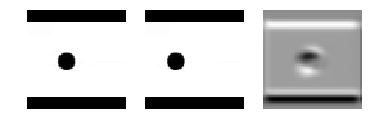

Train on 1 samples
1/1 [==============================] - 0s 52ms/sample - loss: 0.7104


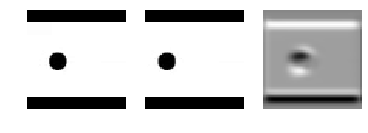

Train on 1 samples
1/1 [==============================] - 0s 55ms/sample - loss: 0.7056


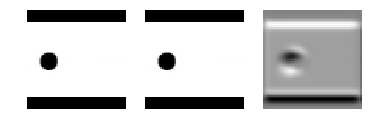

Train on 1 samples
1/1 [==============================] - 0s 50ms/sample - loss: 0.6997


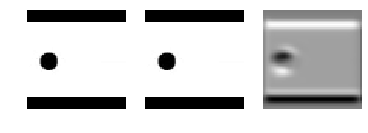

Train on 1 samples
1/1 [==============================] - 0s 48ms/sample - loss: 0.6921


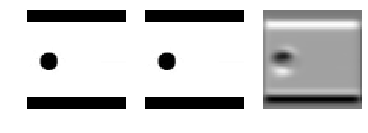

Train on 1 samples
1/1 [==============================] - 0s 52ms/sample - loss: 0.6871


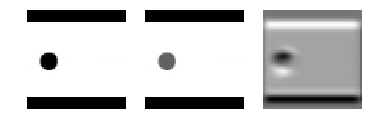

Train on 1 samples
1/1 [==============================] - 0s 51ms/sample - loss: 0.6812


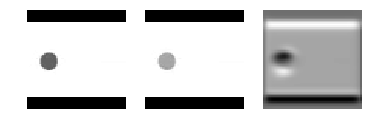

Train on 1 samples
1/1 [==============================] - 0s 51ms/sample - loss: 0.6651


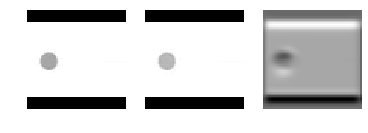

Train on 1 samples
1/1 [==============================] - 0s 50ms/sample - loss: 0.6431


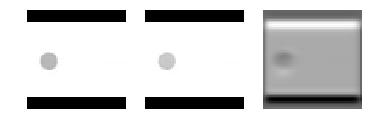

Train on 1 samples
1/1 [==============================] - 0s 52ms/sample - loss: 0.6130


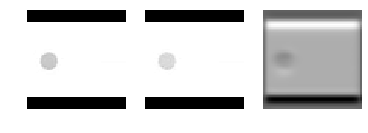

Train on 1 samples
1/1 [==============================] - 0s 49ms/sample - loss: 0.5729


KeyboardInterrupt: ignored

In [0]:
for epoch in range(50):
  anE = np.zeros((1, 1, 64, 64, 6))
  print("Reset")
  for i in range(len(x_train)-1):
    in_im = x_train[i].reshape((1, 64, 64, 1))
    ou_im = x_train[i+1].reshape((1, 64, 64, 1))
    next_img, next_E = grad(in_im, ou_im, anE)
    
    fig, ax = plt.subplots(1, 3)
    ax[0].set_axis_off()
    ax[1].set_axis_off()
    ax[2].set_axis_off()
    
    ax[0].imshow(in_im.reshape((64, 64)), cmap='gray')
    ax[1].imshow(ou_im.reshape((64, 64)), cmap='gray')
    ax[2].imshow(next_img.reshape((64, 64)), cmap='gray')
    plt.show()
    
    anE = hm.predict({'inputs': in_im, 'e_in':anE})

In [0]:
def grad(aInput, aOutput, anE):
#   e0 = np.subtract(aInput, aOutput)
#   e1 = np.subtract(aOutput, aInput)
  
#   E = np.concatenate([e0, e1], axis=-1)
#   E = np.maximum(E, 0)
#   E = np.expand_dims(E, 0)
  
#   hm.fit({'inputs':aInput, 'e_in':anE}, [anE], 1, 1)
  pm.fit({'e_in':anE}, [aOutput], 1, 1) 
  anE = hm.predict({'inputs':aInput, 'e_in':anE})
  pred_img = pm.predict({'e_in': anE})
  
  return pred_img, anE

In [0]:
for epoch in range(50):
  anE = np.zeros((1, 1, 64, 64, 10))
  print("Reset")
  for i in range(len(x_train)-1):
    in_im = x_train[i].reshape((1, 64, 64, 1))
    ou_im = x_train[i+1].reshape((1, 64, 64, 1))
    next_img, next_E = grad(in_im, ou_im, anE)
    
    fig, ax = plt.subplots(1, 3)
    ax[0].set_axis_off()
    ax[1].set_axis_off()
    ax[2].set_axis_off()
    
    ax[0].imshow(in_im.reshape((64, 64)), cmap='gray')
    ax[1].imshow(ou_im.reshape((64, 64)), cmap='gray')
    ax[2].imshow(next_img.reshape((64, 64)), cmap='gray')
    plt.show()
    
    anE = next_E

Output hidden; open in https://colab.research.google.com to view.

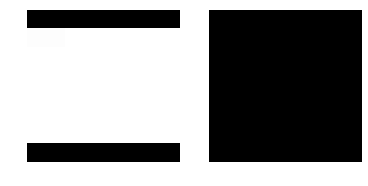

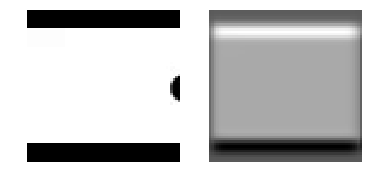

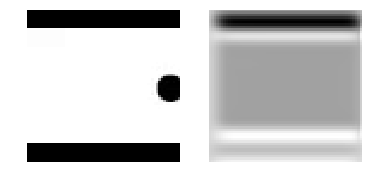

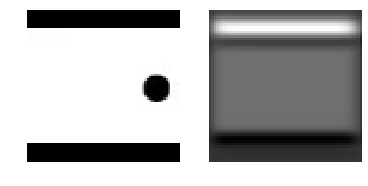

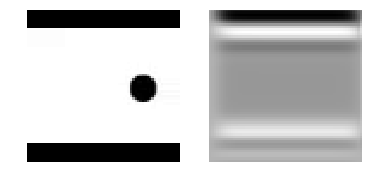

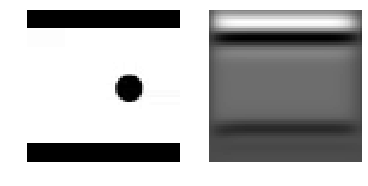

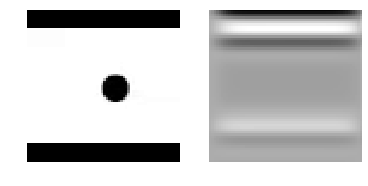

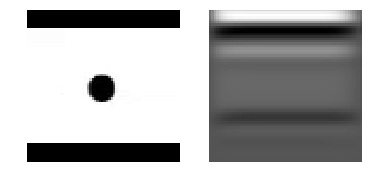

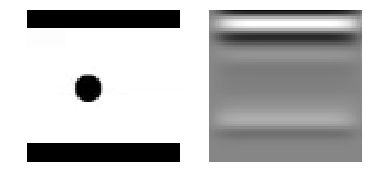

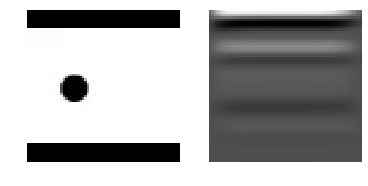

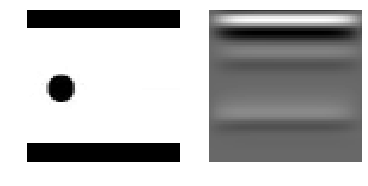

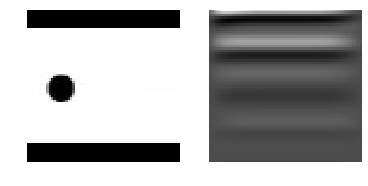

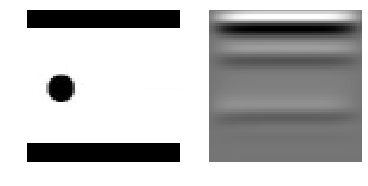

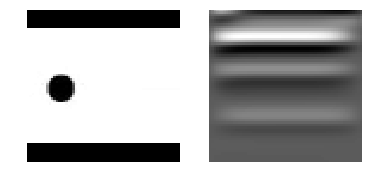

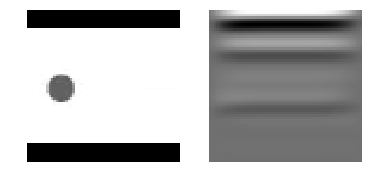

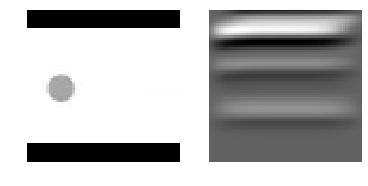

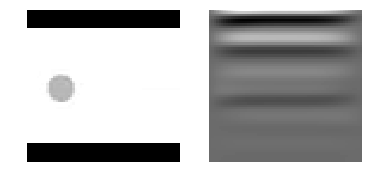

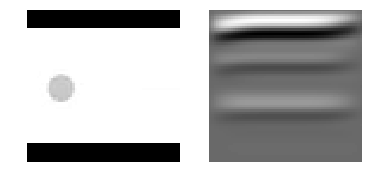

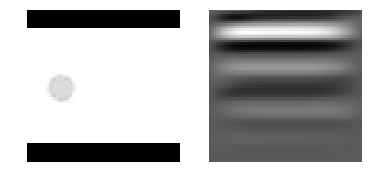

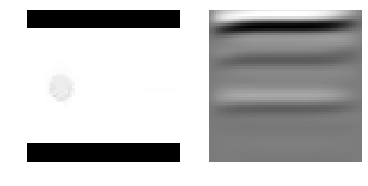

In [0]:
aInput = x_train[0]
aInput = aInput.reshape((1, 64, 64, 1))

# e0 = np.subtract(x_train[0], x_train[1])
# e1 = np.subtract(x_train[1], x_train[0])
# anE = np.concatenate([e0, e1], axis= -1)
# anE = np.maximum(anE, 0)
# anE = np.expand_dims(anE, 0)
# anE = np.expand_dims(anE, 0)
anE = np.zeros((1, 1, 64, 64, 6))


for i in range(len(x_train)):  
  pred = pm.predict({'inputs': aInput, 'e_in':anE})
  anE = hm.predict({'inputs': aInput, 'e_in': anE})
  
  fig, ax = plt.subplots(1, 2)
  ax[0].set_axis_off()
  ax[0].imshow(x_train[i].reshape((64, 64)), cmap='gray')
  
  ax[1].set_axis_off()
  ax[1].imshow(pred.reshape((64, 64)), cmap='gray')
  plt.show()
  
  aInput = pred